In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Analytical Newtonian orbit

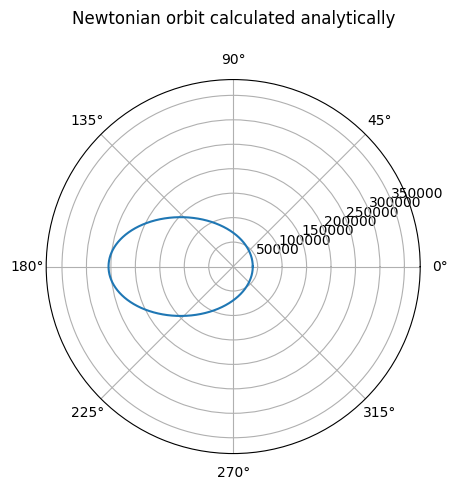

In [2]:
r = lambda ph, x: x[0]/(np.cos(ph)-x[0]*x[4]*x[1]*(x[2]/x[3])**2*(np.cos(ph)-1))
G = 6.67431e-11 ### Gravitational Constant
M = 5.97221e24  ### Earth's Mass
x = [40000., M, 400., 2.1*1e12, G] ### x =  [r0, M, m, l, G]
ph = np.linspace(0,2*np.pi,1000000)
R = r(ph,x)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='polar')
ax.plot(ph, R)
ax.set_rmax(1.5*max(R))

ax.set_title("Newtonian orbit calculated analytically", pad=40)
plt.tight_layout()
plt.show()

It cannot handle hyperbolic orbits.

For a ~circular orbit $L_0 = 1.6\times 10^{12}$ 

## Numerical GR Orbit with RK2

In [3]:
### x = [u, du]
def f(x, c): return np.array([-c[0]/2*x[1]**2-x[0]*(1-c[0]*x[0])+(c[2]/c[3])**2*c[1]*c[4],x[1]])

In [4]:
G = 6.67431e-11 ### Gravitational Constant
M = 5.97221e24  ### Earth's Mass
c = [1/40000., M, 400., 3.1*1e12, G] ### c =  [r0, M, m, l, G]

N = 1000000
x = np.zeros((2,N))
ph = np.linspace(0,5000*2*np.pi,N)

x[0,0] = c[0]
x[1,0] = 0

k = np.zeros((2,2))

h = ph[1]-ph[0]

for i in range(1, ph.size):
    
    k[:,0] = f(x[:,i-1],c)
    
    k[:,1] = f(x[:,i-1] + h*k[:,0],c)

    x[:,i] = x[:,i-1] + h/2*(k[:,0]+k[:,1])

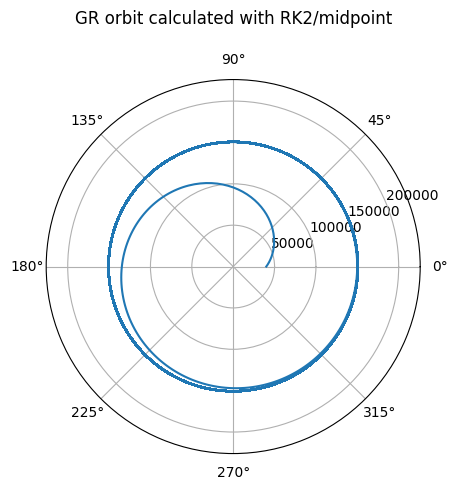

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='polar')
ax.plot(ph, 1/x[0])
ax.set_rmax(max(1.5/x[0]))

ax.set_title("GR orbit calculated with RK2/midpoint", pad=40)
plt.tight_layout()
plt.show()

## SciPy RK45 solver

In [6]:
### x = [u, du]
def f1(t, x): 
    c = [1/40000., M, 400., 3.1*1e12, G]
    return np.array([-c[0]/2*x[1]**2-x[0]*(1-c[0]*x[0])+(c[2]/c[3])**2*c[1]*c[4],x[1]])

N = 1000000
ph_max = 5000*2*np.pi
ph = np.linspace(0,ph_max,N)
h = ph[1]-ph[0]

RK45_Orbit = scipy.integrate.RK45(f1, 0, [1/40000, 0], ph_max, max_step=h, first_step=h, vectorized=True)
                                  

In [7]:
RK45_Orbit.status
h

0.03141595795185589

In [8]:
ph = []
r = []
while RK45_Orbit.t < ph_max:
    RK45_Orbit.step()
    ph.append(RK45_Orbit.t)
    r.append(1/RK45_Orbit.y[0])
RK45_Orbit.status
RK45_Orbit.step_size
len(r)

1000000

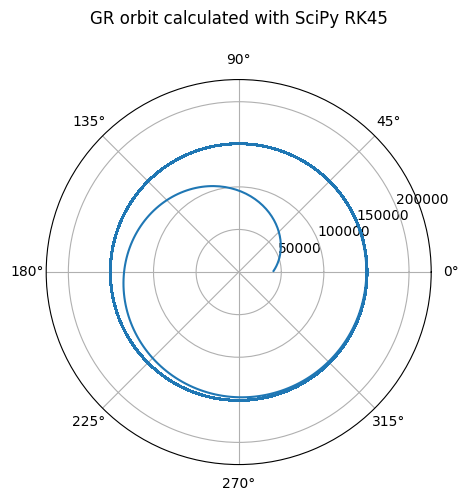

<Figure size 640x480 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='polar')
ax.plot(ph,r)
ax.set_rmax(1.5*max(r))

ax.set_title("GR orbit calculated with SciPy RK45", pad=40)
plt.show()

plt.tight_layout()
plt.show()

## Homebrew RK4

In [10]:
### x = [u, du]
def f(x, c): return np.array([-c[0]/2*x[1]**2-x[0]*(1-c[0]*x[0])+(c[2]/c[3])**2*c[1]*c[4],x[1]])

In [11]:
G = 6.67431e-11 ### Gravitational Constant
M = 5.97221e24  ### Earth's Mass
c = [1/40000., M, 400., 3.1*1e12, G] ### c =  [r0, M, m, l, G]

N = 1000000
x = np.zeros((2,N))
y = np.zeros(N)
ph = np.linspace(0,5000*2*np.pi,N)

x[0,0] = c[0]
x[1,0] = 0
y[0] = f(x[:,0],c)[0]

k = np.zeros((2,4))

h = ph[1]-ph[0]

for i in range(1, ph.size):
    
    k[:,0] = f(x[:,i-1],c)
    
    k[:,1] = f(x[:,i-1] + h*k[:,0],c)

    k[:,2] = f(x[:,i-1] + h/2*k[:,1],c)

    k[:,3] = f(x[:,i-1] + h*k[:,3],c)

    x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    y[i] = f(x[:,i],c)[0]

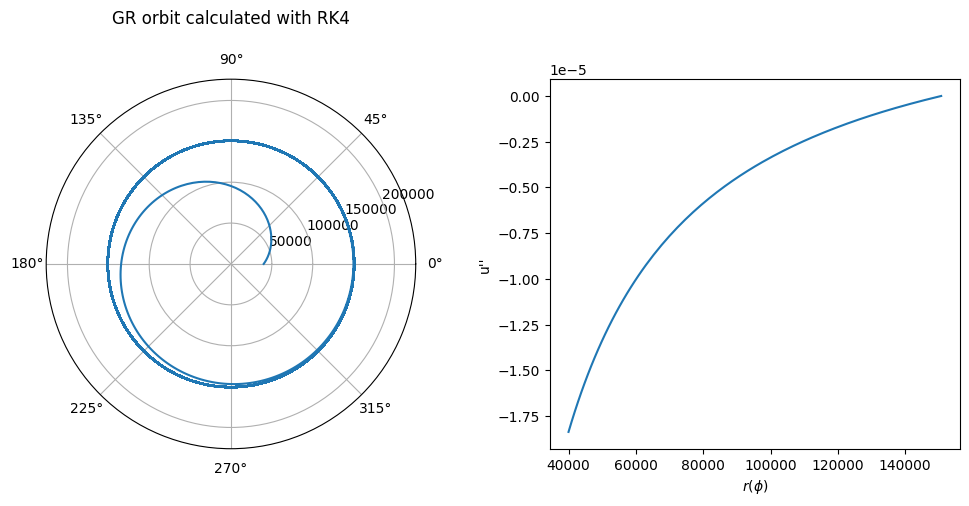

In [12]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax1.plot(ph, 1/x[0])
ax1.set_rmax(max(1.5/x[0]))
ax1.set_title("GR orbit calculated with RK4", pad=40)
ax2 = fig.add_subplot(1,2,2, xlabel=r'$r(\phi)$', ylabel='u\'\'')
ax2.plot(1/x[0], y)

plt.tight_layout()
plt.show()